# Data visualizations using R

## Bar graphs

In this lesson, we will go over the steps involved in making a variety of bar graphs. 

### Grouped bar graph

![image](https://github.com/arkadeep/R-Bootcamp-Data-Visualization/blob/main/Assets/1_images/graphs/bars/bar_vertical_R_reviewed.png?raw=true)

In [2]:
################################# Initial Setup ################################
# Install required packages if they are not already in your system
packages <- c("tidyverse", "showtext")

lapply(packages, function(i) {
    if (!i %in% installed.packages() == T) {
        install.packages(i, dependencies = TRUE, repos = "http://cran.rstudio.com/")
    }
})

# Loading required packages
library("tidyverse")
library("showtext")

font_add_google("Inter", "Inter")
showtext_auto()


[[1]]
NULL

[[2]]
NULL

In [ ]:
############################### Loading dataset ################################
mydata <- read_csv("https://raw.githubusercontent.com/arkadeep/R-Bootcamp-Data-Visualization/main/Assets/2_data/toydata.csv", show_col_types = FALSE)

################################ Data processing ###############################
# Changing the structure of the dataset from wide to long
mydata_long <- mydata %>%
  select(personid, region, bp_high, anemic, overweight) %>%
  pivot_longer(
    cols = c(3:5),
    names_to = "disease",
    values_to = "disease_present"
  ) %>%
  arrange(personid)

# Converting the regions to factor variable so that we can maintain a specific
# legend order. The levels provided below dicates the order of the bars and
# the legend.
mydata_long$region <- factor(mydata_long$region,
  levels = c(
    "North-East", 
    "Mid-West",
    "South", 
    "West"
  )
)

# Creating the means and CIs

# Assuming 95% CI
alpha <- 0.05

# Creating means and CI and storing in my_sum tibble
my_sum <- mydata_long %>%
  group_by(region, disease) %>%
  summarise(
    n = n(),
    mean = mean(disease_present, na.rm = T),
    sd = sd(disease_present, na.rm = T)
  ) %>%
  mutate(se = sd / sqrt(n)) %>%
  mutate(ic = se * qt((1 - alpha) / 2 + 0.5, n - 1)) %>%
  arrange(disease)


In [60]:
############################### Creating the graph #############################
# Define axis and fill variable
x_values <- my_sum$disease
y_values <- my_sum$mean
fill_by <- my_sum$region

plot <- my_sum %>%
  # Setting aesthetic which will be inherited by other geometric objects
  ggplot(aes(x = x_values, y = y_values, fill = fill_by)) +

  # "identity" selected for stat since we want the heights of the bars to
  # represent values in the data. The default, "bin" makes the height of each
  # bar equal to the number of cases in each group.
  # position dodge applied so that the bars are not superimposed.
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.7) +

  # Setting the legend/scale colors
  scale_fill_manual(values = c("#264D96", "#5480D6", "#A8BFEB", "#DEE5F7")) +

  # Setting the x-axis labels. The expand option removes the space around the
  # axis and the data. Please feel free to change the values and see how the
  # plot is affected.
  scale_x_discrete(
    labels = c("Anemic", "High Blood Pressure", "Overweight"),
    expand = c(0, 0)
  ) +

  # Position dodge applied so that the error bars are not superimposed. The
  # width can be tweaked to ensure that are positioned correctly on top of the
  # bars
  geom_errorbar(aes(ymin = y_values - ic, ymax = y_values + ic),
    width = 0.20,
    size = 0.5,
    position = position_dodge(width = 0.8)
  ) +

  # Customizing the y-axis by changing the limits, axis tick values and labels
  scale_y_continuous(
    expand = c(0, 0),
    limits = c(0, max(y_values) + 0.2),
    breaks = c(seq(from = 0, to = 0.7, by = 0.1)),
    labels = c("0", "10", "20", "30", "40", "50", "60", "70")
  ) +

  # Adding the text which will display the mean of the bars. They are positioned
  # 0.01 units on top of (mean + ic). This ensures that there is some space
  # between the error bars and the text.
  # As with previous geometric objects, position dodge has been applied here as
  # well so that the mean is not superimposed.
  geom_label(
    aes(
      y = y_values, 
      label = round(y_values * 100, 1)
    ),
    position = position_dodge(width = 0.8),
    size = 2.3,
    show.legend = FALSE,
    color = "black"
  ) +

  # Graph title and axis labels
  labs(
    title = "Health indicator prevalence, by region",
    y = "Percent %"
  )


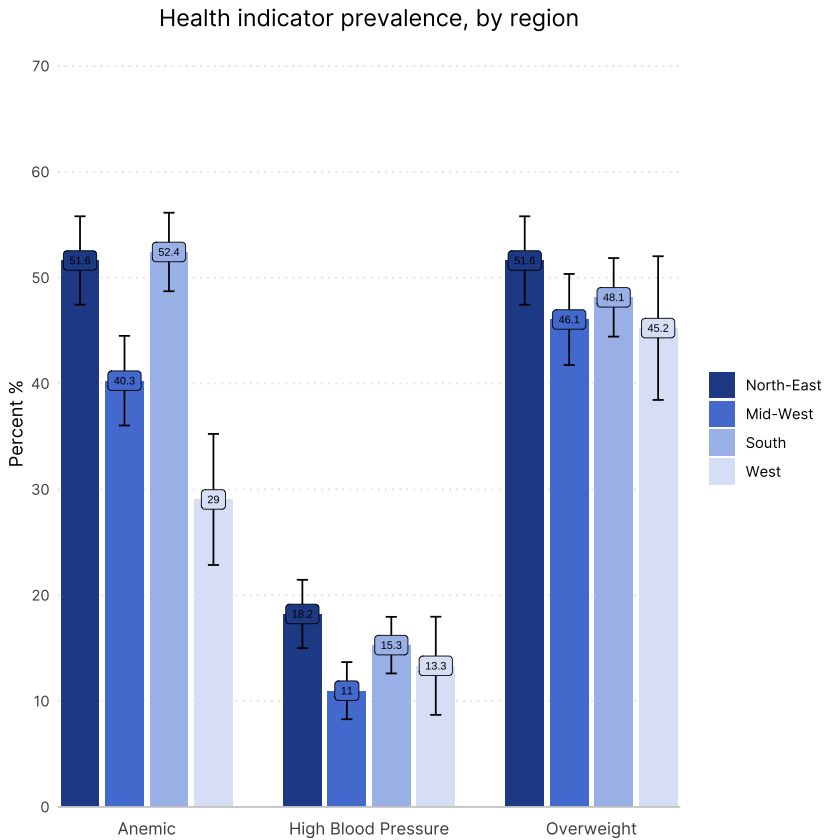

In [61]:
############################# Formatting the graph #############################


plot +
  theme_classic() +
  # The following visual changes have been made:
  # Removed x-axis title
  # Made the x-axis line a light shade of gray
  # Removed the y-axis line
  # Created y-axis grid lines which are light gray and dotted
  # Removed axis ticks
  # Removed legend title
  # Vertically aligned and resized x-axis text
  # Center aligned and resized the plot title
  theme(
    text = element_text(family = "Inter"),
    axis.title.x = element_blank(),
    axis.line.x = element_line(color = "grey80"),
    axis.line.y = element_blank(),
    panel.grid.major.y = element_line(colour = "grey90", linetype = "dotted"),
    axis.ticks = element_blank(),
    legend.title = element_blank(),
    axis.text.x = element_text(vjust = -1, size = 10),
    plot.title = element_text(hjust = 0.5, size = 14)
  )


Flipping the coordinates to get a horizontal graph

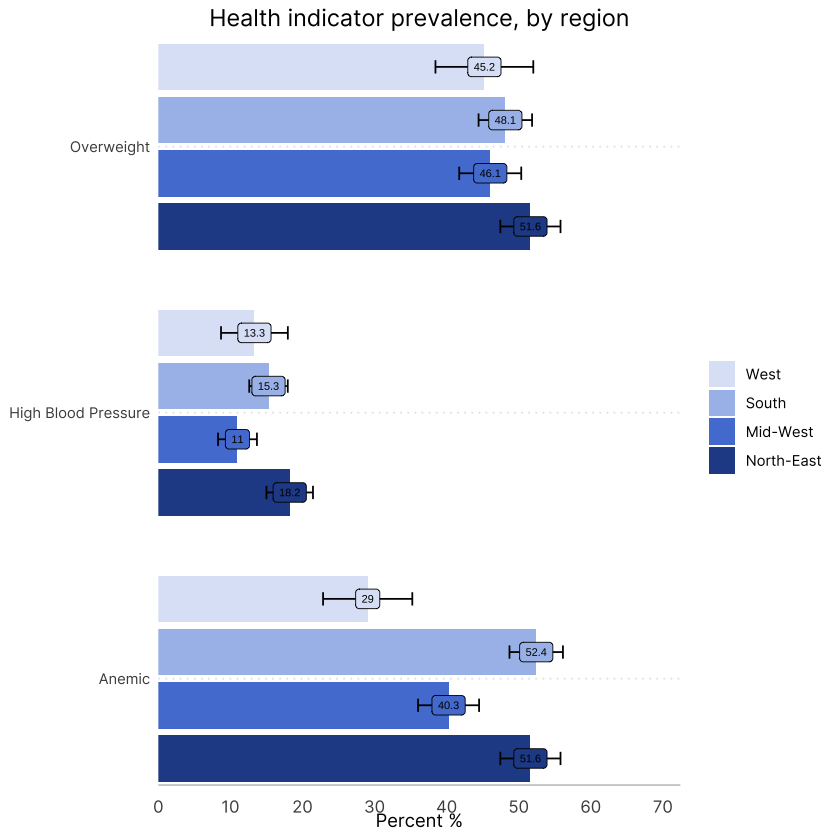

In [47]:
############################# Formatting the graph #############################


plot +
  coord_flip() +
  guides(
    fill = guide_legend(reverse = TRUE)
  ) + 
  theme_classic() +
  # The following visual changes have been made:
  # Removed x-axis title
  # Made the x-axis line a light shade of gray
  # Removed the y-axis line
  # Created y-axis grid lines which are light gray and dotted
  # Removed axis ticks
  # Removed legend title
  # Vertically aligned and resized x-axis text
  # Center aligned and resized the plot title
  theme(
    text = element_text(family = "Inter"),
    axis.title.y = element_blank(),
    axis.line.x = element_line(color = "grey80"),
    axis.line.y = element_blank(),
    panel.grid.major.y = element_line(colour = "grey90", linetype = "dotted"),
    axis.ticks = element_blank(),
    legend.title = element_blank(),
    axis.text.x = element_text(vjust = -1, size = 10),
    plot.title = element_text(hjust = 0.5, size = 14)
  )
